<a href="https://colab.research.google.com/github/carolina-garay/grupo_32/blob/SebastianOrmaechea-patch-1/BorradorPr%C3%A1ctico1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
# Trabajo práctico entregable - Parte 1

*Grupo 32*

Integrantes: 
- Garay, Carolina del Valle
- Ormaechea, Sebastián Gabriel
- Ramos, Pablo Nicolás
- Reviglio, Valentín
- Siner, Magalí
             
Introducción:

En el presente documento se exploran y analizan los resultados de la encuesta de salarios 2020 de sysarmy, a fin de resolver los siguientes interrogantes: 

- ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

- ¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?

## Exploración de la base de datos

###   Importación de librerías necesarias

In [4]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns

sns.set_context('talk')

### Lectura del dataset

In [5]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df_orig = pd.read_csv(url)
df_orig.shape

(6095, 48)

La base de datos cuenta con 6095 respuestas a la encuesta, donde se consultó por 48 variables diferentes.
A continuación, se exploran las columnas a fin de detectar las variables relevantes para el análisis.

In [6]:
df_orig.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

Seleccionamos las siguientes variables como relevantes:

Variable RESPUESTA:

    - Salario mensual neto :'salary_monthly_NETO'. Tipo: cuantitativa
    
Variables EXPLICATIVAS:
    
    - Lenguajes de programación utilizados: 'tools_programming_languages'. Tipo: categórica
    
    - Nivel de estudios: 'profile_studies_level'. Tipo: categórica
    
    - Años de experiencia: 'profile_years_experience'. Tipo: cuantitativa
    
    - Rol de trabajo: 'work_role'. Tipo: categórica
    
    - Tipo de contrato de trabajo: 'work_contract_type'. Tipo: categórica 
    
*Nota: El tipo de variable se corroboró mediante la inspección de la columna con el método "df["column_name"].unique()"

### Selección de las filas relevantes para los análisis. 

In [7]:
s_neto= 'salary_monthly_NETO'

# Cálculo de medidas de centralización
max_salario = df_orig[s_neto].max()
med_salario = df_orig[s_neto].median()
mod_salario = df_orig[s_neto].mode()

print("Salario máximo NETO:",max_salario, "$ARS")
print("Mediana del salario NETO:",med_salario, "$ARS")
print("Moda del salario NETO:",mod_salario,"$ARS") 
# Habría que ver cómo quitar el "0" que aparece antes de 80000 y que aparezca el "$ ARS" luego de 80000

Salario máximo NETO: 2080000.0 $ARS
Mediana del salario NETO: 78000.0 $ARS
Moda del salario NETO: 0    80000.0
dtype: float64 $ARS


In [8]:
#Cálculo de frecuencias para diferentes salarios y rangos de salario

cont1,cont2,cont3=0,0,0
cont3_a,cont3_b,cont4,cont4_a,cont4_b,cont5, cont6,cont7,cont8,cont9,cont10,cont11=0,0,0,0,0,0,0,0,0,0,0,0 

for i in range(1,len(df_orig)):
  if (df_orig.loc[i,s_neto] ==80000):
    cont1 = cont1 + 1

for i in range(1,len(df_orig)):
  if df_orig.loc[i,s_neto] == 100000:
    cont2 = cont2 + 1  

for i in range(1,len(df_orig)):
  if df_orig.loc[i,s_neto] ==200000:
    cont3 = cont3 + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >=60000) and (df_orig.loc[i,s_neto] <=70000)):
    cont3_a= cont3_a + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >70000) and (df_orig.loc[i,s_neto] <=80000)):
    cont3_b= cont3_b + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >80000) and (df_orig.loc[i,s_neto] <=90000)):
    cont4= cont4 + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >90000) and (df_orig.loc[i,s_neto] <=100000)):
    cont4_a= cont4_a + 1   

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >100000) and (df_orig.loc[i,s_neto] <=200000)):
    cont4_b= cont4_b + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >200000) and (df_orig.loc[i,s_neto] <=300000)):
    cont5 = cont5 + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >300000) and (df_orig.loc[i,s_neto] <=400000)):
    cont6 = cont6 + 1

for i in range(1,len(df_orig)):
   if ((df_orig.loc[i,s_neto] >400000) and (df_orig.loc[i,s_neto] <=500000)):
     cont7 = cont7 + 1   
for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >500000) and (df_orig.loc[i,s_neto] <=600000)):
    cont8 = cont8 + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >600000) and (df_orig.loc[i,s_neto] <=700000)):
    cont9 = cont9 + 1

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >700000) and (df_orig.loc[i,s_neto] <=800000)):
    cont10 =cont10 +1    

for i in range(1,len(df_orig)):
  if ((df_orig.loc[i,s_neto] >800000) and (df_orig.loc[i,s_neto] <=900000)):
    cont11 = cont11 + 1

print("Cantidad de personas con sueldos igual a 80mil $ARS (Moda):",cont1) 
print("Cantidad de personas con salarios igual a 100mil $ARS:",cont2)
print("Cantidad de personas con sueldos igual a 200mil $ARS:", cont3)
print("Cantidad de personas con sueldos entre 60mil y 70mil $ARS:", cont3_a)
print("Cantidad de personas con sueldos entre 70mil y 80mil $ARS:", cont3_b)
print("Cantidad de personas con sueldos entre 80mil y 90mil $ARS:", cont4)
print("Cantidad de personas con sueldos entre 90mil y 1000mil $ARS:", cont4_a)
print("Cantidad de personas con sueldos entre 100mil y 200mil $ARS:", cont4_b)
print("Cantidad de personas con sueldos entre 200mil y 300mil $ARS:", cont5)
print("Cantidad de personas con sueldos entre 300mil y 400mil $ARS:", cont6)
print("Cantidad de personas con sueldos entre 400mil y 500mil $ARS:", cont7)
print("Cantidad de personas con sueldos entre 500mil y 600mil $ARS:", cont8)
print("Cantidad de personas con sueldos entre 600mil y 700mil $ARS:", cont9)
print("Cantidad de personas con sueldos entre 700mil y 800mil $ARS:", cont10)
print("Cantidad de personas con sueldos entre 800mil y 900mil $ARS:",cont11)

Cantidad de personas con sueldos igual a 80mil $ARS (Moda): 149
Cantidad de personas con salarios igual a 100mil $ARS: 139
Cantidad de personas con sueldos igual a 200mil $ARS: 41
Cantidad de personas con sueldos entre 60mil y 70mil $ARS: 648
Cantidad de personas con sueldos entre 70mil y 80mil $ARS: 621
Cantidad de personas con sueldos entre 80mil y 90mil $ARS: 542
Cantidad de personas con sueldos entre 90mil y 1000mil $ARS: 514
Cantidad de personas con sueldos entre 100mil y 200mil $ARS: 1341
Cantidad de personas con sueldos entre 200mil y 300mil $ARS: 154
Cantidad de personas con sueldos entre 300mil y 400mil $ARS: 73
Cantidad de personas con sueldos entre 400mil y 500mil $ARS: 41
Cantidad de personas con sueldos entre 500mil y 600mil $ARS: 17
Cantidad de personas con sueldos entre 600mil y 700mil $ARS: 5
Cantidad de personas con sueldos entre 700mil y 800mil $ARS: 6
Cantidad de personas con sueldos entre 800mil y 900mil $ARS: 7


Considerando la distribución de salarios, se decidió filtrar la base de datos mediante un valor mínimo y un valor máximo. 

El valor mínimo se estableció en 54.207 `$`ARS que corresponde a la Canasta Básica Total (CBT) en diciembre de 2020 (Fte:INDEC). Se considera que valores por debajo de la CBT posiblemente correspondan a trabajos part-time o ad-honorem, los cuales no nos interesa que se incorporen al análisis. En el apéndice se desarrolla un breve análisis de los contratos part_time. 

El valor máximo se estableció en 542.070 `$`ARS, correspondiente a 10 CBT. Este valor parece adecuado considerando que en el análisis previo se observa una fuerte caída en la cantidad de entrevistados a partir de salarios de 500.000 `$`ARS. Cabe comentar que el valor máximo corresponde al cuartil de 75% mas 8 veces el intercuartil. 

In [9]:
q1 = df_orig[s_neto].quantile(0.25)
q3 = df_orig[s_neto].quantile(0.75)
iqr = q3 - q1
n= (542070 - q3)/iqr 
n

7.998349229640499

In [10]:
# Filtrado de la base de datos original (df_orig) y generación de la nueva base de datos (df_new)
df_new=  df_orig[(df_orig[s_neto] > 54207) & (df_orig[s_neto] < 542070)]
print(df_new.shape)

# Reviso si hay filas duplicadas
df_new.duplicated().any() # Si, hay filas duplicadas, ya que aparece True.

# Lo siguiente  me permite observar ambas filas de cada fila duplicada. El total es 89 filas. ¿No debería ser par?
df_new[df_new.duplicated(keep=False)]

# Lo siguiente me permite observar solo una fila de cada fila duplicada. 
# Hay 47 filas duplicadas. ¿No debería ser la mitad de 89?
df_new[df_new.duplicated()]  

# Elimino las filas duplicadas
df_final = df_new.drop_duplicates()
print(df_final.shape)

(4206, 48)
(4159, 48)


Text(0.5, 1.0, 'Base de datos procesada')

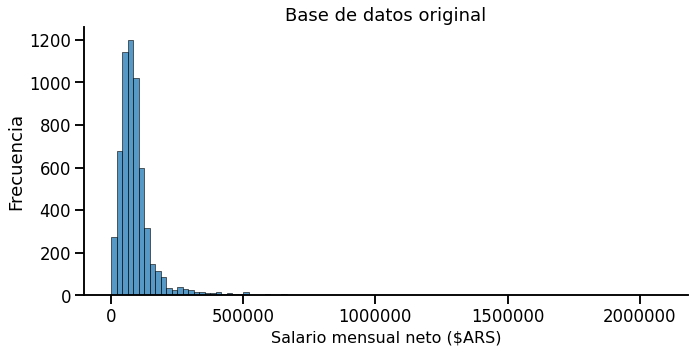

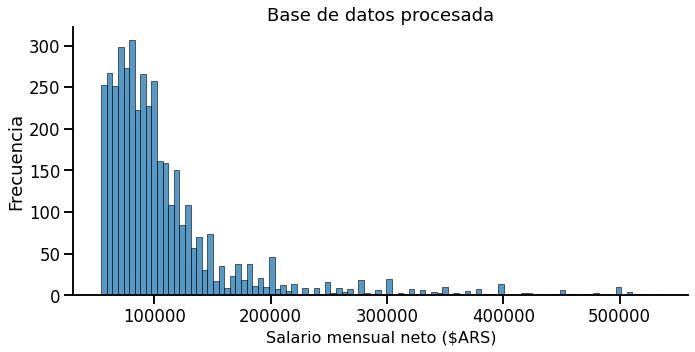

In [11]:
# Comparación gráfica de las bases de datos
sns.displot(df_orig[s_neto], aspect=2, bins=100) 
plt.ticklabel_format(style='plain')
plt.ylabel("Frecuencia")
plt.xlabel('Salario mensual neto ($ARS)', fontsize=16)
plt.title("Base de datos original")

sns.displot(df_final[s_neto], aspect=2, bins=100) 
plt.ticklabel_format(style='plain')
plt.ylabel("Frecuencia")
plt.xlabel('Salario mensual neto ($ARS)',fontsize=16)
plt.title("Base de datos procesada")

La nueva base de datos conserva una alta proporción de los datos totales de la encuesta (68%), descartando valores extremos mínimos y máximos, y valores duplicados. Se observa que la mayor proporción de los encuestados declara un salario en torno a los 100.000 $ARS.

## Análisis de lenguajes de programación

Se realizó un análisis de los salarios en función del lenguaje de programación utilizado por los encuestados. El objetivo fue responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

In [41]:
# Selecciono las columnas relevantes
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

# Genero un nuevo dataframe con las columnas relevantes y elimino los valores NaN

df2 = df_final[relevant_columns]
df2 = df2[df2['salary_monthly_NETO'].notna()]
df2 = df2.reset_index(drop=True) # Este método permite indexar desde cero
df2.tools_programming_languages[:5]

0                             HTML, Javascript, Python
1                                              Ninguno
2    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
3               CSS, HTML, Javascript, SQL, TypeScript
4                                           Javascript
Name: tools_programming_languages, dtype: object

**A continuación se separan los lenguajes de programación y se cuenta la frecuencia con la que aparecen dichos lenguajes.**

In [40]:
# Se convierten las cadenas de texto (strings) de la columna lenguajes de programación a una lista de strings.
# Se remueve el string 'ninguno de los anteriores', los espacios y las comas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remoción de la opción 'other'
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Se separan los string en una lista de items
  # Se remueven los espacios y comas de cada item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Se crea una nueva columna con la lista de lenguajes
df2.loc[:, 'cured_programming_languages'] = df2.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Se REPLICA cada fila del dataframe por cada lenguaje de programación mencionado en la respuesta 
df_lang = df2.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df2[relevant_columns])\
    .rename(columns={0: 'programming_language'})
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
0,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
0,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,ninguno,Ninguno,127000.0,[ninguno]
2,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"[bash/shell, c, css, html, java, javascript, p..."


**En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces.**

    Lenguaje de programación  Frecuencia
0                 javascript        1711
1                        sql        1483
2                       html        1216
3                     python        1130
4                       java        1074
..                       ...         ...
158                  mongodb           1
159                    boomi           1
160                     dell           1
161                      x++           1
162                infobasic           1

[163 rows x 2 columns]


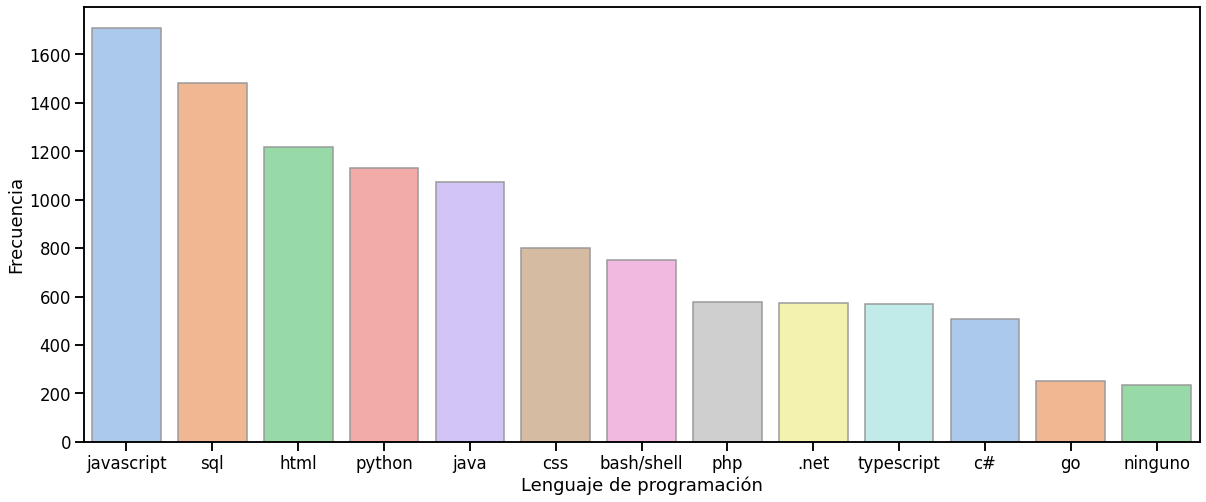

In [15]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Lenguaje de programación', 'programming_language': 'Frecuencia'})
print(language_count)

# Consideramos unicamente como lenguajes populares aquellos que tengan más del 1.5% de votos. Mismo criterio que las PASO
required_votes = language_count.Frecuencia.sum() * 0.015
language_count = language_count[language_count.Frecuencia > required_votes]

plt.figure(figsize=(20,8))
sns.barplot(x="Lenguaje de programación", y="Frecuencia" , palette="pastel", edgecolor=".6", data=language_count)


### Filtrado de lenguajes relevantes

**El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `popular_languages`.**

In [18]:
popular_languages = language_count["Lenguaje de programación"] # Utilizamos la columna de lenguajes del dataframe ya filtrado, para obtener la lista de lenguajes populares 
filtered_df_lang = df_lang[df_lang.programming_language.isin(popular_languages)]
filtered_df_lang = filtered_df_lang[['programming_language', 'salary_monthly_NETO']]

In [42]:
# Calculamos los valores de la base de datos final sobre lenguajes de programación
filtered_df_lang["salary_monthly_NETO"].describe().apply(lambda s: '{0:.1f}'.format(s)) 
# La función apply se usó para especificar el número de decimales

count     10881.0
mean     113720.6
std       70089.9
min       54310.0
25%       74655.0
50%       93000.0
75%      122000.0
max      535000.0
Name: salary_monthly_NETO, dtype: object

**Luego del filtrado, buscamos responder que tan probable es tener un sueldo mayor a la media, dada la elección de un determinado lenguaje.**

In [20]:
salary_mean = filtered_df_lang.salary_monthly_NETO.mean()
print("A continuación se lista el porcentaje de personas que ganan más de: {} $ARS (media)".format('%.1f'%salary_mean))
for language in popular_languages:
    specific_lang_df = filtered_df_lang[filtered_df_lang.programming_language == language]
    specific_lang_and_higher_mean = specific_lang_df[specific_lang_df.salary_monthly_NETO > salary_mean]
    print("El {}% de las personas que programan en {} ganan más de la media".format('%.1f'% ((len(specific_lang_and_higher_mean)/len(specific_lang_df))*100), language))


A continuación se lista el porcentaje de personas que ganan más de: 113720.6 $ARS (media)
El 30.8% de las personas que programan en javascript ganan más de la media
El 27.2% de las personas que programan en sql ganan más de la media
El 27.1% de las personas que programan en html ganan más de la media
El 34.3% de las personas que programan en python ganan más de la media
El 33.5% de las personas que programan en java ganan más de la media
El 26.3% de las personas que programan en css ganan más de la media
El 33.9% de las personas que programan en bash/shell ganan más de la media
El 32.0% de las personas que programan en php ganan más de la media
El 28.3% de las personas que programan en .net ganan más de la media
El 34.2% de las personas que programan en typescript ganan más de la media
El 27.0% de las personas que programan en c# ganan más de la media
El 49.4% de las personas que programan en go ganan más de la media
El 23.4% de las personas que programan en ninguno ganan más de la med

Text(0, 0.5, 'Lenguaje de programación')

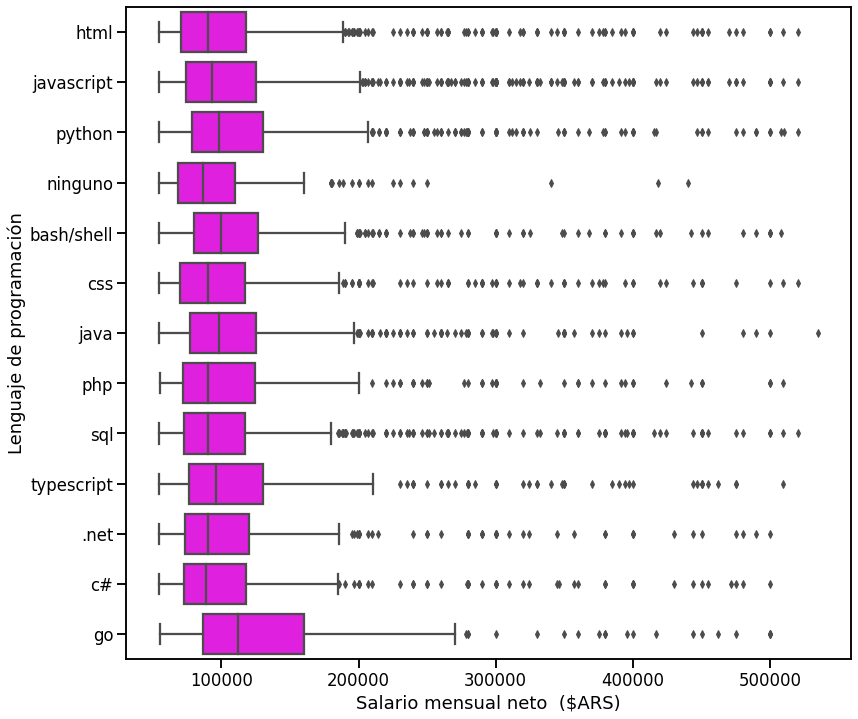

In [21]:
# Graficamos la distribución de los salarios para lenguaje de programación
plt.figure(figsize=(13, 12))
sns.boxplot(data=filtered_df_lang, x=s_neto, y='programming_language',
                color='magenta')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Salario mensual neto  ($ARS)")
plt.ylabel("Lenguaje de programación")

Describir la gráfica precedente de boxplot!!!

### Conclusiones sobre el análisis de los lenguajes de programación
Los análisis precedentes revelan que aquellos que utilizan el lenguaje de programación "Go", son los que tienen mayor probabilidad (49,4%) de ganar un salario por encima de la media de 113.720 $ARS. En un lejano segundo (34,3%) y tercer (34,2%) puesto se encuentran aquellos que programan con Python y Tapescript respectivamente. 
Por otra parte, es interesante observar en la gráfica que, independientemente del lenguaje de programación utilizado, una importante cantidad de programadores logran pactar salarios muy por encima de la media (outliers). 

##  Análisis de densidad conjunta, asociación, densidad condicional y densidad conjunta condicional.

Para estos análisis se contemplan el resto de las variables explicativas: 

    - Nivel de estudios: 'profile_studies_level'. Tipo: categórica
    
    - Años de experiencia: 'profile_years_experience'. Tipo: cuantitativa
    
    - Rol de trabajo: 'work_role'. Tipo: categórica

## a) Densidad conjunta

La densidad conjunta es la distribución de probabilidad que forman dos o más variables aleatorias cuando sus realizaciones se producen simultáneamente. Dicho de otro modo, la densidad o probabilidad conjunta es una medida estadística que indica la probabilidad de que dos sucesos ocurran al mismo tiempo. 

Para el caso de nuestra base de datos, analizaremos la probabilidad conjunta del género y el nivel de estudio mediante una tabla de contingencia. Responderemos a la pregunta ¿Qué probabilidad hay de encontrar en la base una mujer con estudios de posgrado? 

In [22]:
df_final.profile_studies_level.value_counts()

Universitario    2880
Terciario         719
Posgrado          275
Secundario        262
Doctorado          18
Posdoctorado        3
Primario            2
Name: profile_studies_level, dtype: int64

In [24]:
## Tablas de contingencia
print("                                                                                 ")
print("*************************CÁLCULO DE PROBABILIDADES CONJUNTAS*************************************")
print(pd.crosstab(df_final.profile_studies_level, df_final.profile_gender,margins = True, margins_name= "subtotal"))
print("                                                                                 ")
print("                                                                                   ")

                                                                                 
*************************CÁLCULO DE PROBABILIDADES CONJUNTAS*************************************
profile_gender         Hombre  Mujer  Otros  subtotal
profile_studies_level                                
Doctorado                  13      4      1        18
Posdoctorado                3      0      0         3
Posgrado                  211     63      1       275
Primario                    2      0      0         2
Secundario                246     15      1       262
Terciario                 631     85      3       719
Universitario            2476    393     11      2880
subtotal                 3582    560     17      4159
                                                                                 
                                                                                   


In [25]:
total_personas = len(df_final.profile_gender)
print("Probabilidad de que sea mujer y tenga estudios de posgrado:",round(63/total_personas,3)*100," %")

Probabilidad de que sea mujer y tenga estudios de posgrado: 1.5  %


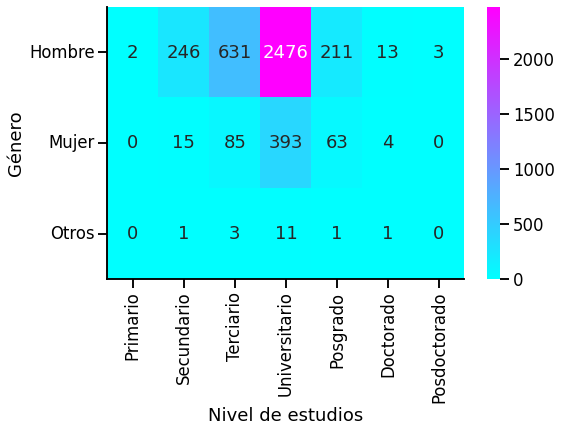

In [27]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(8,5))
exp = pd.crosstab(df_final.profile_gender,
                  df_final.profile_studies_level)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='g', cmap='cool')
plt.xticks(rotation=90)
plt.xlabel("Nivel de estudios")
plt.yticks(rotation=0)
plt.ylabel("Género")
sns.despine()

## b) Asociación

La asociación es una medida que determina el grado de vinculación entre dos variables. Para variables cuantitativas, las medidas de asociación más utilizadas son la covarianza y el coeficiente de correlación de Pearson.

En el ejercicio original se plantea la comparación de salario bruto y neto. Tal vez podamos utilizar el análisis que realizó Pablo


## c) Densidad condicional 

La diferencia entre probabilidad conjunta y probabilidad condicional es que en la probabilidad conjunta, los dos eventos tienen que ocurrir al mismo tiempo, en cambio, la probabilidad condicional se refiere a la probabilidad de que suceda un evento si otro evento ya se ha cumplido.

Para el caso de nuestra base de datos, analizaremos la distribución del salario según el nivel de estudio. La pregunta que densidad condicional que buscaremos responder será ¿Cuál es la probabilidad de ganar un salario mayor a la media, dado que el nivel de estudios alcanzado es de secundario?

In [72]:
a = df_final[df_final["profile_studies_level"] == "Secundario"][s_neto]
b = a[a > df_final[s_neto].mean()]
print("La probabilidad de encontrar un programador que gane un sueldo mayor a la media, dado que alcanzó el nivel secundario, es de ", 
      str(len(b)/len(df_final[df_final["profile_studies_level"] == "Secundario"])*100), " %")

La probabilidad de encontrar un programador que gane un sueldo mayor a la media, dado que alcanzó el nivel secundario, es de  25.954198473282442  %


Dicho de otra manera, entre los programadores que alcanzaron solo el nivel secundario, solo el 26 % recibe un salario mayor a la media.

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

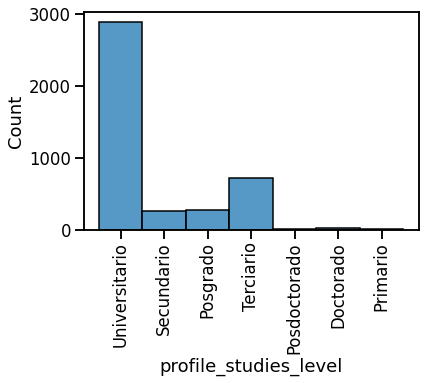

In [31]:
# Graficamos un histograma para identificar las subppoblaciones más numerosas
sns.histplot(x=df_final["profile_studies_level"])
plt.xticks(rotation=90)

In [32]:
# Graficamos 

## d) Densidad Conjunta condicional

La densidad conjunta condicional, permite calcular la probabilidad conjunta de dos eventos, dado que ya ha sucedido un tercer evento. 

Para el caso de nuestra base de datos, analizaremos...

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


# Bibliografía:

- Resultados de la Encuesta de sueldos 2020. Link: https://sysarmy.com/blog/posts/resultados-de-la-encuesta-de-sueldos-2020-2/

- Canasta Básica Total Diciembre 2020. Fuente: INDEC (https://www.indec.gob.ar/ftp/cuadros/sociedad/serie_cba_cbt.xls)

# Apéndice:

Análisis de contratos Part time:
    Dado que en una pregunta consideramos el concepto "Part time" como parte de la respuesta, analizamos la variable Tipo de contrato ("work_contract_type") que contempla "Part time" como una de las opciones de respuesta.

['Full-Time' 'Freelance' 'Part-Time'
 'Tercerizado (trabajo a través de consultora o agencia)'
 'Remoto (empresa de otro país)']


count       302.000000
mean      45053.783728
std       53500.762773
min           9.000000
25%       25000.000000
50%       37648.500000
75%       53825.000000
max      836400.000000
Name: salary_monthly_NETO, dtype: float64

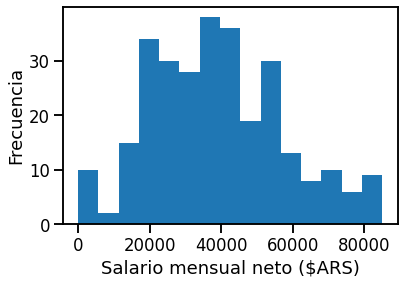

In [33]:
print(df_orig['work_contract_type'].unique())
part_time = df_orig[df_orig['work_contract_type'] == 'Part-Time']
plt.hist(part_time[s_neto], bins=15, range =[0,85000])
plt.xlabel("Salario mensual neto ($ARS)")
plt.ylabel("Frecuencia")
part_time[s_neto].describe()


Como se esperaba, los programadores Part time, son parte de los trabajadores que cobran salarios por debajo de la media. No obstante, consideramos que no es una fuente de información generalizable a la población, ya que la opción Part time se encuentra comprendida en una pregunta donde las opciones no son comparables en términos de tiempo de dedicación al trabajo. Por ejemplo, Trabajo remoto no es comparable con Part time. Además, los trabajadores Part time representan un porción muy pequeña de los encuestados (302 de 6095). Por ello, consideramos como recomendación, la reformulación de esta pregunta para futuras encuestas, a fin de permitir la comparación entre trabajadores Full time y Part time.